In [ ]:
import pandas as pd

In [ ]:
dataframe=pd.read_csv("/content/collegePlace.csv")

In [ ]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
dataframe.shape

(2966, 8)

In [ ]:
dataframe['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [ ]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,Electronics And Communication,1,8,1,1,1
1,21,1,Computer Science,0,7,1,1,1
2,22,1,Information Technology,1,6,0,0,1
3,21,0,Information Technology,0,8,0,1,1
4,22,0,Mechanical,0,8,1,0,1


In [ ]:
dataframe['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [ ]:
dataframe['Stream'].replace({'Electronics And Communication':0,'Computer Science':1,'Information Technology':2,'Mechanical':3,'Electrical':4,'Civil':5},inplace=True)

In [ ]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1,8,1,1,1
1,21,1,1,0,7,1,1,1
2,22,1,2,1,6,0,0,1
3,21,0,2,0,8,0,1,1
4,22,0,3,0,8,1,0,1


In [ ]:
dataframe.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
age=dataframe['Age']
stream=dataframe['Stream']
internship=dataframe['Internships']
cgpa=dataframe['CGPA']
hostel=dataframe['Hostel']
backlog=dataframe['HistoryOfBacklogs']
Y=dataframe['PlacedOrNot']

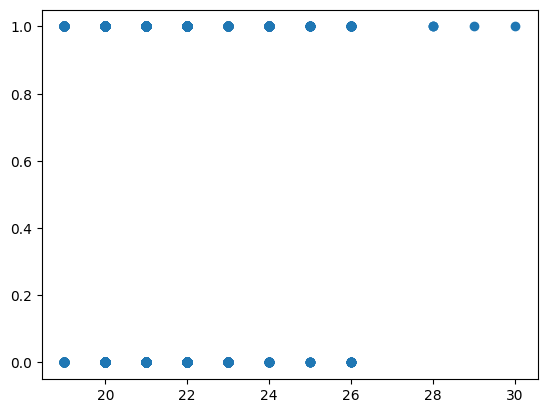

In [ ]:
plt.scatter(age,Y)

In [ ]:
Y=dataframe['PlacedOrNot']
X=dataframe.drop(['PlacedOrNot'],axis=1)

In [ ]:
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,0,0,1,8,1,1
1,21,1,1,0,7,1,1
2,22,1,2,1,6,0,0
3,21,0,2,0,8,0,1
4,22,0,3,0,8,1,0
...,...,...,...,...,...,...,...
2961,23,0,2,0,7,0,0
2962,23,0,3,1,7,1,0
2963,22,0,2,1,7,0,0
2964,22,0,1,1,7,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf=XGBClassifier(learning_ratde=0.09,n_estimators=150)

In [ ]:
clf.fit(X_train,Y_train,eval_metric='logloss')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:54:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "learning_ratde" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_ratde=0.09,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
type(stream[1])

numpy.int64

In [ ]:
gender=dataframe['Gender']

In [ ]:
type(stream[1])

numpy.int64

In [ ]:
type(gender[1])

numpy.int64

In [ ]:
prediction=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
print("accuracy_score:" +str(accuracy_score(Y_test,prediction)*100))

accuracy_score:87.7104377104377
